## E-Commerce Shipping & Delivery Performance Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/DELL/Documents/DA DS Projects/E-commerce Shipping and Delievery Ana/Train.csv")

In [3]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['ID'].duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [16]:
df.rename(columns={"Mode_of_Shipment":"Shipment_mode",
                  "Cost_of_the_Product":"Product_Cost",
                  "Weight_in_gms":"Weights_gms",
                  "Reached.on.Time_Y.N":"Delivery_status"},inplace=True)

In [17]:
df.head()

,ID,Warehouse_block,Shipment_mode,Customer_care_calls,Customer_rating,Product_Cost,Prior_purchases,Product_importance,Gender,Discount_offered,Weights_gms,Delivery_status
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Converting Delivery Status of 1-> On Time and 0-> Delayed

In [20]:
def convert(values):
    if values==1:
        return "On Time"
    else:
        return "Delayed"

In [21]:
df['Delivery_status']=df['Delivery_status'].apply(convert)

In [28]:
df.tail(10)

,ID,Warehouse_block,Shipment_mode,Customer_care_calls,Customer_rating,Product_Cost,Prior_purchases,Product_importance,Gender,Discount_offered,Weights_gms,Delivery_status
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,Delayed
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,Delayed
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,On Time
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,Delayed
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,Delayed
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,On Time
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,Delayed
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,Delayed
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,Delayed
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,Delayed


#### Droping unnecessary columns

In [29]:
df.drop(columns=['ID'],inplace=True)

In [31]:
df.head()

,Warehouse_block,Shipment_mode,Customer_care_calls,Customer_rating,Product_Cost,Prior_purchases,Product_importance,Gender,Discount_offered,Weights_gms,Delivery_status
0,D,Flight,4,2,177,3,low,F,44,1233,On Time
1,F,Flight,4,5,216,2,low,M,59,3088,On Time
2,A,Flight,2,2,183,4,low,M,48,3374,On Time
3,B,Flight,3,3,176,4,medium,M,10,1177,On Time
4,C,Flight,2,2,184,3,medium,F,46,2484,On Time


### Feature Engineering

#### Delivery Status Count

In [32]:
df['Delay_flag']=df['Delivery_status'].apply(
    lambda x:1 if x=='Delayed' else 0
)

In [34]:
df.tail(10)

,Warehouse_block,Shipment_mode,Customer_care_calls,Customer_rating,Product_Cost,Prior_purchases,Product_importance,Gender,Discount_offered,Weights_gms,Delivery_status,Delay_flag
10989,B,Ship,5,1,218,5,medium,F,9,1603,Delayed,1
10990,C,Ship,5,4,219,6,low,M,3,1098,Delayed,1
10991,F,Ship,5,2,261,5,medium,M,9,1227,On Time,0
10992,D,Ship,5,1,236,5,medium,M,3,1906,Delayed,1
10993,F,Ship,5,1,257,6,low,F,1,1150,Delayed,1
10994,A,Ship,4,1,252,5,medium,F,1,1538,On Time,0
10995,B,Ship,4,1,232,5,medium,F,6,1247,Delayed,1
10996,C,Ship,5,4,242,5,low,F,4,1155,Delayed,1
10997,F,Ship,5,2,223,6,medium,M,2,1210,Delayed,1
10998,D,Ship,2,5,155,5,low,F,6,1639,Delayed,1


#### Discount Category

In [38]:
df['Discount_category'] = pd.cut(
    df['Discount_offered'],
    bins=[-1, 10, 30, 100],
    labels=['Low', 'Medium', 'High']
)

In [39]:
df.head()

,Warehouse_block,Shipment_mode,Customer_care_calls,Customer_rating,Product_Cost,Prior_purchases,Product_importance,Gender,Discount_offered,Weights_gms,Delivery_status,Delay_flag,Discount_category
0,D,Flight,4,2,177,3,low,F,44,1233,On Time,0,High
1,F,Flight,4,5,216,2,low,M,59,3088,On Time,0,High
2,A,Flight,2,2,183,4,low,M,48,3374,On Time,0,High
3,B,Flight,3,3,176,4,medium,M,10,1177,On Time,0,Low
4,C,Flight,2,2,184,3,medium,F,46,2484,On Time,0,High


#### Weight Category

In [40]:
df['Weight_Category']=pd.cut(
    df['Weights_gms'],
    bins=[0,3000,6000,10000],
    labels=['Light','Medium','Heavy']
)

In [41]:
df.head()

,Warehouse_block,Shipment_mode,Customer_care_calls,Customer_rating,Product_Cost,Prior_purchases,Product_importance,Gender,Discount_offered,Weights_gms,Delivery_status,Delay_flag,Discount_category,Weight_Category
0,D,Flight,4,2,177,3,low,F,44,1233,On Time,0,High,Light
1,F,Flight,4,5,216,2,low,M,59,3088,On Time,0,High,Medium
2,A,Flight,2,2,183,4,low,M,48,3374,On Time,0,High,Medium
3,B,Flight,3,3,176,4,medium,M,10,1177,On Time,0,Low,Light
4,C,Flight,2,2,184,3,medium,F,46,2484,On Time,0,High,Light


### Exploratory Data Analysis (EDA)

#### Delivery Status Count

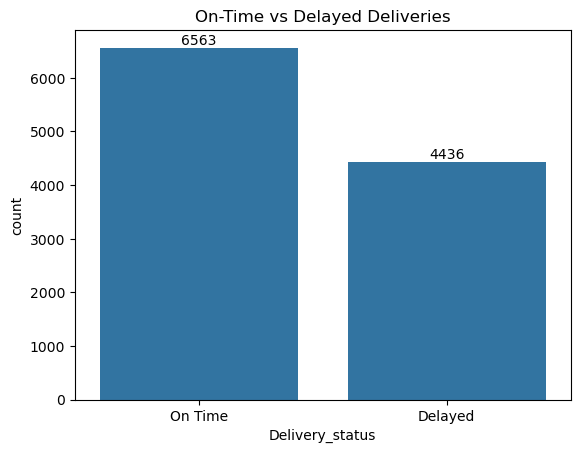

In [43]:
ax=sns.countplot(x='Delivery_status',data=df)
ax.bar_label(ax.containers[0])
plt.title("On-Time vs Delayed Deliveries")
plt.show()

#### Delay by Shipment Mode

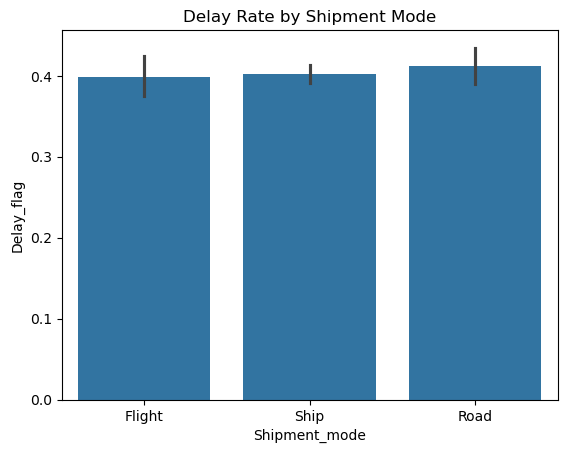

In [48]:
sns.barplot(x='Shipment_mode', y='Delay_flag', data=df)
plt.title("Delay Rate by Shipment Mode")
plt.show()

#### Discount vs Delivery Status

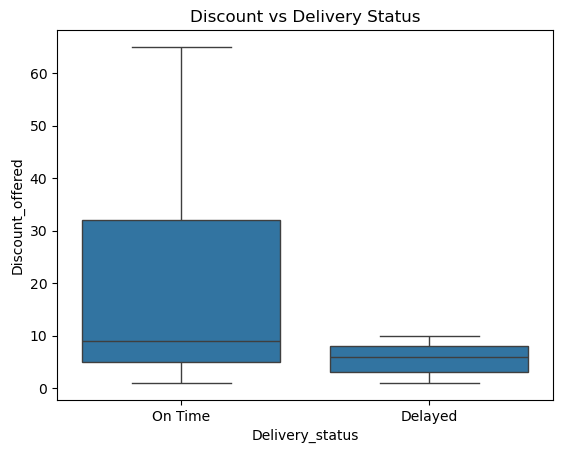

In [50]:
sns.boxplot(x='Delivery_status', y='Discount_offered', data=df)
plt.title("Discount vs Delivery Status")
plt.show()

#### Customer Rating vs Delay

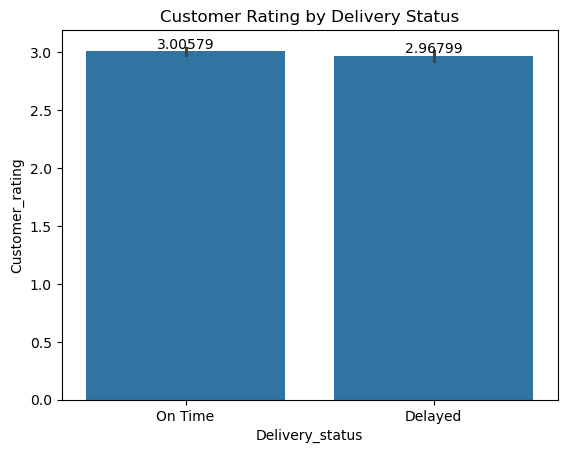

In [58]:
ax=sns.barplot(x='Delivery_status', y='Customer_rating', data=df)
ax.bar_label(ax.containers[0])
plt.title("Customer Rating by Delivery Status")
plt.show()

### Exporting data to CSV

In [60]:
df.to_csv("C:/Users/DELL/Documents/DA DS Projects/E-commerce Shipping and Delievery Ana/ecommerce_shipping_cleaned.csv",index=False)